# TP 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

## 1. Chargement des données

In [2]:
# Charger le dataset Titanic depuis OpenML
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame

# Afficher les 5 premières lignes
print("Les 5 premières lignes :")
print(df.head())
print("\n" + "="*50 + "\n")

# Informations générales
print("Informations générales :")
print(df.info())

Les 5 premières lignes :
   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0     

## 2. Vérification des types de données

In [3]:
# Afficher le type de chaque colonne
print("Types de données par colonne :")
print(df.dtypes)
print("\n" + "="*30 + "\n")

# Identifier les colonnes numériques et catégorielles
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Colonnes numériques : {numeric_cols}")
print(f"Colonnes catégorielles : {categorical_cols}")

Types de données par colonne :
pclass          int64
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object


Colonnes numériques : ['pclass', 'age', 'sibsp', 'parch', 'fare', 'body']
Colonnes catégorielles : ['survived', 'name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


## 3. Vérification et suppression des doublons

In [4]:
# Compter le nombre de lignes dupliquées
nb_doublons = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {nb_doublons}")

if nb_doublons > 0:
    print(f"Suppression de {nb_doublons} ligne(s) dupliquée(s)...")
    df = df.drop_duplicates()
    print(f"Taille du dataset après suppression : {df.shape}")
else:
    print("Aucun doublon détecté.")

Nombre de lignes dupliquées : 0
Aucun doublon détecté.


## 4. Analyse des valeurs manquantes

In [5]:
# Compter les valeurs manquantes par colonne
valeurs_manquantes = df.isna().sum()
print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)
print("\n" + "="*30 + "\n")

# Pourcentage de valeurs manquantes
pourcentage_manquantes = (valeurs_manquantes / len(df)) * 100
print("Pourcentage de valeurs manquantes par colonne :")
for col, pct in pourcentage_manquantes.items():
    if pct > 0:
        print(f"{col}: {pct:.2f}%")

Valeurs manquantes par colonne :
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Pourcentage de valeurs manquantes par colonne :
age: 20.09%
fare: 0.08%
cabin: 77.46%
embarked: 0.15%
boat: 62.87%
body: 90.76%
home.dest: 43.09%


## 5. Statistiques descriptives

In [6]:
# Statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives - Colonnes numériques :")
print(df.describe())
print("\n" + "="*50 + "\n")

# Statistiques descriptives pour les colonnes catégorielles
print("Statistiques descriptives - Colonnes catégorielles :")
print(df.describe(include=['object', 'category']))

Statistiques descriptives - Colonnes numériques :
            pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135     0.498854     0.385027    33.295479   
std       0.837836    14.413500     1.041658     0.865560    51.758668   
min       1.000000     0.166700     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

             body  
count  121.000000  
mean   160.809917  
std     97.696922  
min      1.000000  
25%     72.000000  
50%    155.000000  
75%    256.000000  
max    328.000000  


Statistiques descriptives - Colonnes catégorielles :
       survived                  name   sex    t

## 6. Sélection des colonnes utiles

In [7]:
# Sélectionner uniquement les colonnes utiles
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']

print("Colonnes disponibles :")
print(df.columns.tolist())
print("\nColonnes sélectionnées :")
print(features)

# Vérifier quelles colonnes existent vraiment
available_features = [col for col in features if col in df.columns]
print(f"\nColonnes disponibles dans le dataset : {available_features}")

# Conserver uniquement les colonnes disponibles
df = df[available_features].copy()
print(f"\nTaille du dataset après sélection : {df.shape}")
print("\nAperçu du dataset filtré :")
print(df.head())

Colonnes disponibles :
['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

Colonnes sélectionnées :
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']

Colonnes disponibles dans le dataset : ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']

Taille du dataset après sélection : (1309, 8)

Aperçu du dataset filtré :
   pclass     sex      age  sibsp  parch      fare embarked survived
0       1  female  29.0000      0      0  211.3375        S        1
1       1    male   0.9167      1      2  151.5500        S        1
2       1  female   2.0000      1      2  151.5500        S        0
3       1    male  30.0000      1      2  151.5500        S        0
4       1  female  25.0000      1      2  151.5500        S        0


## 7. Encodage de la variable cible

In [8]:
# Vérifier les valeurs uniques de la variable cible avant encodage
if 'survived' in df.columns:
    print("Valeurs uniques de 'survived' avant encodage :")
    print(df['survived'].value_counts())
    
    # Encoder la variable cible si elle contient des chaînes de caractères
    if df['survived'].dtype == 'object':
        le = LabelEncoder()
        df['survived'] = le.fit_transform(df['survived'])
        print(f"\nMapping appliqué : {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    print("\nValeurs uniques de 'survived' après encodage :")
    print(df['survived'].value_counts())
else:
    print("La colonne 'survived' n'est pas disponible dans le dataset.")

Valeurs uniques de 'survived' avant encodage :
survived
0    809
1    500
Name: count, dtype: int64

Valeurs uniques de 'survived' après encodage :
survived
0    809
1    500
Name: count, dtype: int64


## 8. Analyse exploratoire visuelle

<Figure size 1500x500 with 0 Axes>

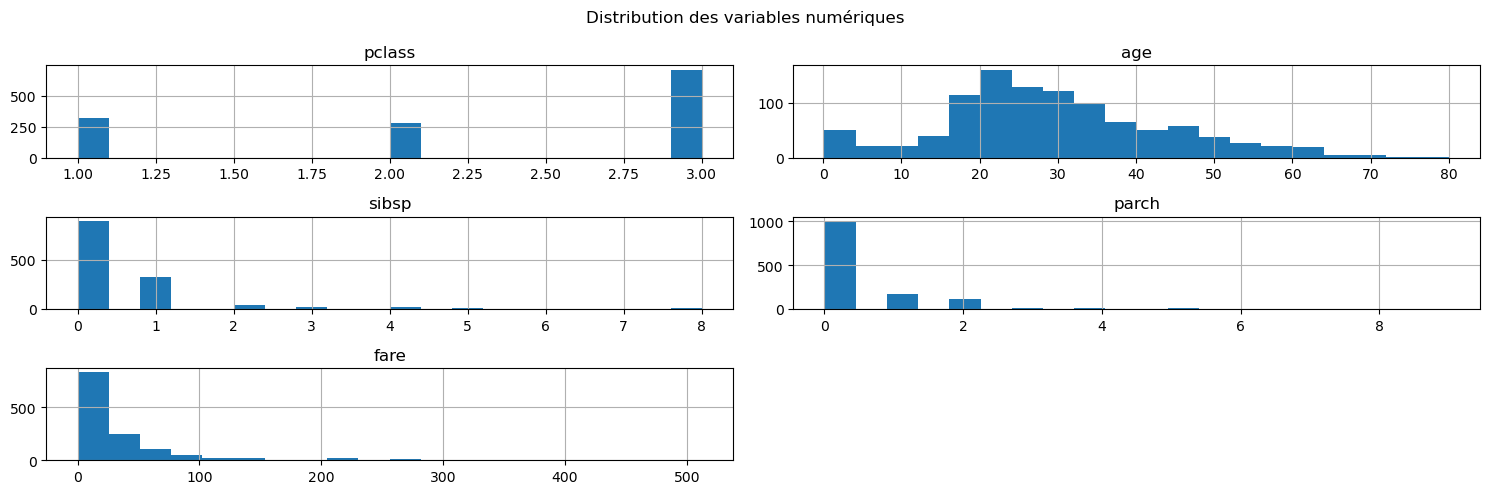

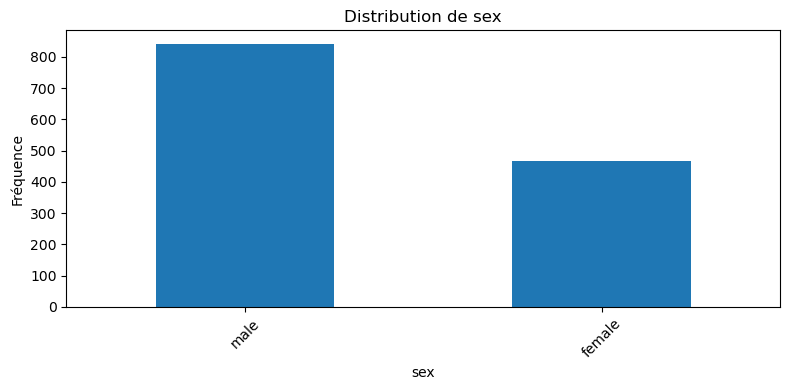

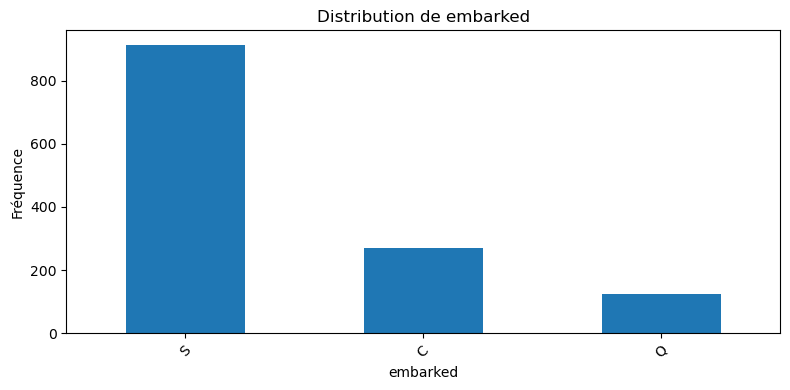

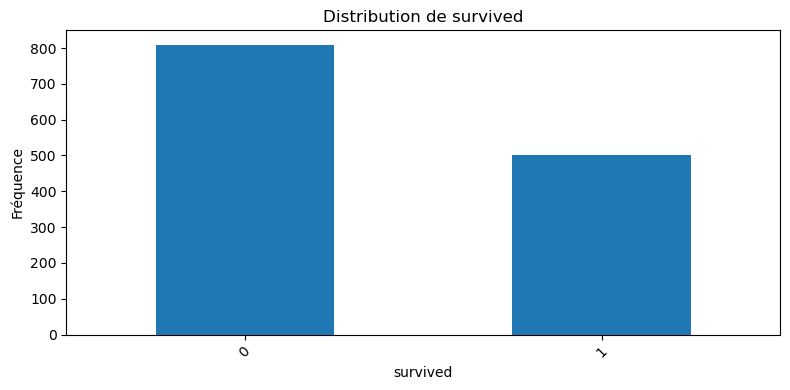

In [9]:
# Visualisation des variables numériques (histogrammes)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'survived' in numeric_cols:
    numeric_cols.remove('survived')  # Exclure la variable cible

if len(numeric_cols) > 0:
    plt.figure(figsize=(15, 5))
    df[numeric_cols].hist(bins=20, figsize=(15, 5))
    plt.suptitle('Distribution des variables numériques')
    plt.tight_layout()
    plt.show()

# Visualisation des variables catégorielles (barres)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 9. Nettoyage des valeurs manquantes

In [10]:
# Identifier les colonnes numériques et catégorielles (exclure la variable cible)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if 'survived' in num_cols:
    num_cols.remove('survived')

print("Valeurs manquantes avant traitement :")
print(df.isna().sum())

# Remplacer les valeurs manquantes dans les colonnes numériques par la moyenne
if len(num_cols) > 0:
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    print(f"\nColonnes numériques traitées : {num_cols}")

# Remplacer les valeurs manquantes dans les colonnes catégorielles par le mode
for col in cat_cols:
    if df[col].isna().sum() > 0:
        mode_value = df[col].mode()
        if len(mode_value) > 0:
            df[col] = df[col].fillna(mode_value[0])
            print(f"Colonne '{col}' : valeurs manquantes remplacées par '{mode_value[0]}'")

print("\nValeurs manquantes après traitement :")
print(df.isna().sum())

Valeurs manquantes avant traitement :
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
survived      0
dtype: int64

Colonnes numériques traitées : ['pclass', 'age', 'sibsp', 'parch', 'fare']
Colonne 'embarked' : valeurs manquantes remplacées par 'S'

Valeurs manquantes après traitement :
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64


## 10. Encodage des variables catégorielles (features)

In [11]:
# Identifier les colonnes catégorielles à encoder (exclure la cible)
cat_cols_to_encode = [col for col in cat_cols if col != 'survived']

print(f"Colonnes à encoder : {cat_cols_to_encode}")
print(f"Shape avant encodage : {df.shape}")

if len(cat_cols_to_encode) > 0:
    # Appliquer One-Hot Encoding avec suppression de la première modalité
    df_encoded = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)
    print(f"Shape après encodage : {df_encoded.shape}")
    
    # Afficher les nouvelles colonnes créées
    new_cols = [col for col in df_encoded.columns if col not in df.columns]
    print(f"Nouvelles colonnes créées : {new_cols}")
    
    # Remplacer le dataframe original
    df = df_encoded
    
    print("\nAperçu après encodage :")
    print(df.head())
else:
    print("Aucune colonne catégorielle à encoder.")

Colonnes à encoder : ['sex', 'embarked']
Shape avant encodage : (1309, 8)
Shape après encodage : (1309, 9)
Nouvelles colonnes créées : ['sex_male', 'embarked_Q', 'embarked_S']

Aperçu après encodage :
   pclass      age  sibsp  parch      fare survived  sex_male  embarked_Q  \
0       1  29.0000      0      0  211.3375        1     False       False   
1       1   0.9167      1      2  151.5500        1      True       False   
2       1   2.0000      1      2  151.5500        0     False       False   
3       1  30.0000      1      2  151.5500        0      True       False   
4       1  25.0000      1      2  151.5500        0     False       False   

   embarked_S  
0        True  
1        True  
2        True  
3        True  
4        True  


## 11. Séparation des features et de la cible

In [12]:
# Séparer les variables explicatives X et la variable cible y
if 'survived' in df.columns:
    X = df.drop('survived', axis=1)
    y = df['survived']
    
    print(f"Shape de X (features) : {X.shape}")
    print(f"Shape de y (target) : {y.shape}")
    print(f"\nColonnes dans X : {X.columns.tolist()}")
    print(f"Distribution de y :\n{y.value_counts()}")
else:
    print("La colonne 'survived' n'est pas disponible. Utilisation de toutes les colonnes comme features.")
    X = df
    y = None

Shape de X (features) : (1309, 8)
Shape de y (target) : (1309,)

Colonnes dans X : ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
Distribution de y :
survived
0    809
1    500
Name: count, dtype: int64


## 12. Division du dataset en train/test

In [13]:
# Division du dataset en ensembles d'entraînement (80%) et de test (20%) de façon stratifiée
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    
    print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} échantillons")
    print(f"Taille de l'ensemble de test : {X_test.shape[0]} échantillons")
    print(f"Proportion train/test : {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.1%} / {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]):.1%}")
    
    print(f"\nDistribution de y_train :\n{y_train.value_counts()}")
    print(f"\nDistribution de y_test :\n{y_test.value_counts()}")
else:
    print("Impossible de diviser : pas de variable cible disponible.")

Taille de l'ensemble d'entraînement : 1047 échantillons
Taille de l'ensemble de test : 262 échantillons
Proportion train/test : 80.0% / 20.0%

Distribution de y_train :
survived
0    647
1    400
Name: count, dtype: int64

Distribution de y_test :
survived
0    162
1    100
Name: count, dtype: int64


## 13. Normalisation et standardisation des données

In [14]:
if 'X_train' in locals() and 'X_test' in locals():
    # Standardisation des données (moyenne = 0, écart-type = 1)
    scaler_standard = StandardScaler()
    X_train_standard = scaler_standard.fit_transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    print("Standardisation (StandardScaler) :")
    print(f"Moyenne de X_train_standard : {X_train_standard.mean(axis=0)[:3]}...")  # Afficher les 3 premières
    print(f"Écart-type de X_train_standard : {X_train_standard.std(axis=0)[:3]}...")
    
    # Normalisation Min-Max (valeurs entre 0 et 1)
    scaler_minmax = MinMaxScaler()
    X_train_minmax = scaler_minmax.fit_transform(X_train)
    X_test_minmax = scaler_minmax.transform(X_test)
    
    print(f"\nNormalisation Min-Max (MinMaxScaler) :")
    print(f"Min de X_train_minmax : {X_train_minmax.min(axis=0)[:3]}...")
    print(f"Max de X_train_minmax : {X_train_minmax.max(axis=0)[:3]}...")
    
    print(f"\nShapes après transformation :")
    print(f"X_train_standard : {X_train_standard.shape}")
    print(f"X_test_standard : {X_test_standard.shape}")
    print(f"X_train_minmax : {X_train_minmax.shape}")
    print(f"X_test_minmax : {X_test_minmax.shape}")
else:
    print("Les données d'entraînement et de test ne sont pas disponibles.")

Standardisation (StandardScaler) :
Moyenne de X_train_standard : [ 1.50998814e-16  3.68165649e-16 -6.78646357e-18]...
Écart-type de X_train_standard : [1. 1. 1.]...

Normalisation Min-Max (MinMaxScaler) :
Min de X_train_minmax : [0. 0. 0.]...
Max de X_train_minmax : [1. 1. 1.]...

Shapes après transformation :
X_train_standard : (1047, 8)
X_test_standard : (262, 8)
X_train_minmax : (1047, 8)
X_test_minmax : (262, 8)


## Conclusion

Ce notebook a couvert toutes les étapes essentielles du prétraitement des données pour le dataset Titanic :

1. **Chargement** : Import du dataset depuis OpenML
2. **Exploration** : Analyse des types de données et statistiques descriptives  
3. **Nettoyage** : Suppression des doublons et traitement des valeurs manquantes
4. **Visualisation** : Graphiques pour comprendre la distribution des variables
5. **Encodage** : Transformation des variables catégorielles et de la cible
6. **Préparation** : Division train/test et normalisation des données

Les données sont maintenant prêtes pour l'entraînement de modèles de machine learning !

In [15]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.dtypes


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [17]:
# Calcul des statistiques descriptives pour la colonne 'Minuties'
statistiques = df.describe()

# Affichage des statistiques
print(statistiques)


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [18]:
# Comptage des valeurs manquantes par ligne
valeurs_manquantes_par_ligne = df.isnull().sum(axis=1)
print(valeurs_manquantes_par_ligne)
# Suppression des lignes avec des valeurs manquantes
df= df.dropna()

# Affichage du DataFrame après suppression
print(df.head())


0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [19]:
# Vérifier s'il y a des doublons
nb_doublons = df.duplicated().sum()
print(f"Nombre de lignes en double : {nb_doublons}")

# Afficher éventuellement les lignes en double
df_doublons = df[df.duplicated()]
print(df_doublons.head())

Nombre de lignes en double : 0
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


In [20]:

import matplotlib.pyplot as plt

# Pour ne pas avoir trop de barres, on prend juste les 20 premières lignes
sns.barplot(x=df.index[:20], y=df['MedHouseVal'][:20])

plt.title("Valeur médiane des maisons (20 premières lignes)")
plt.xlabel("Index")
plt.ylabel("Valeur médiane")
plt.xticks(rotation=45)
plt.show()


NameError: name 'sns' is not defined

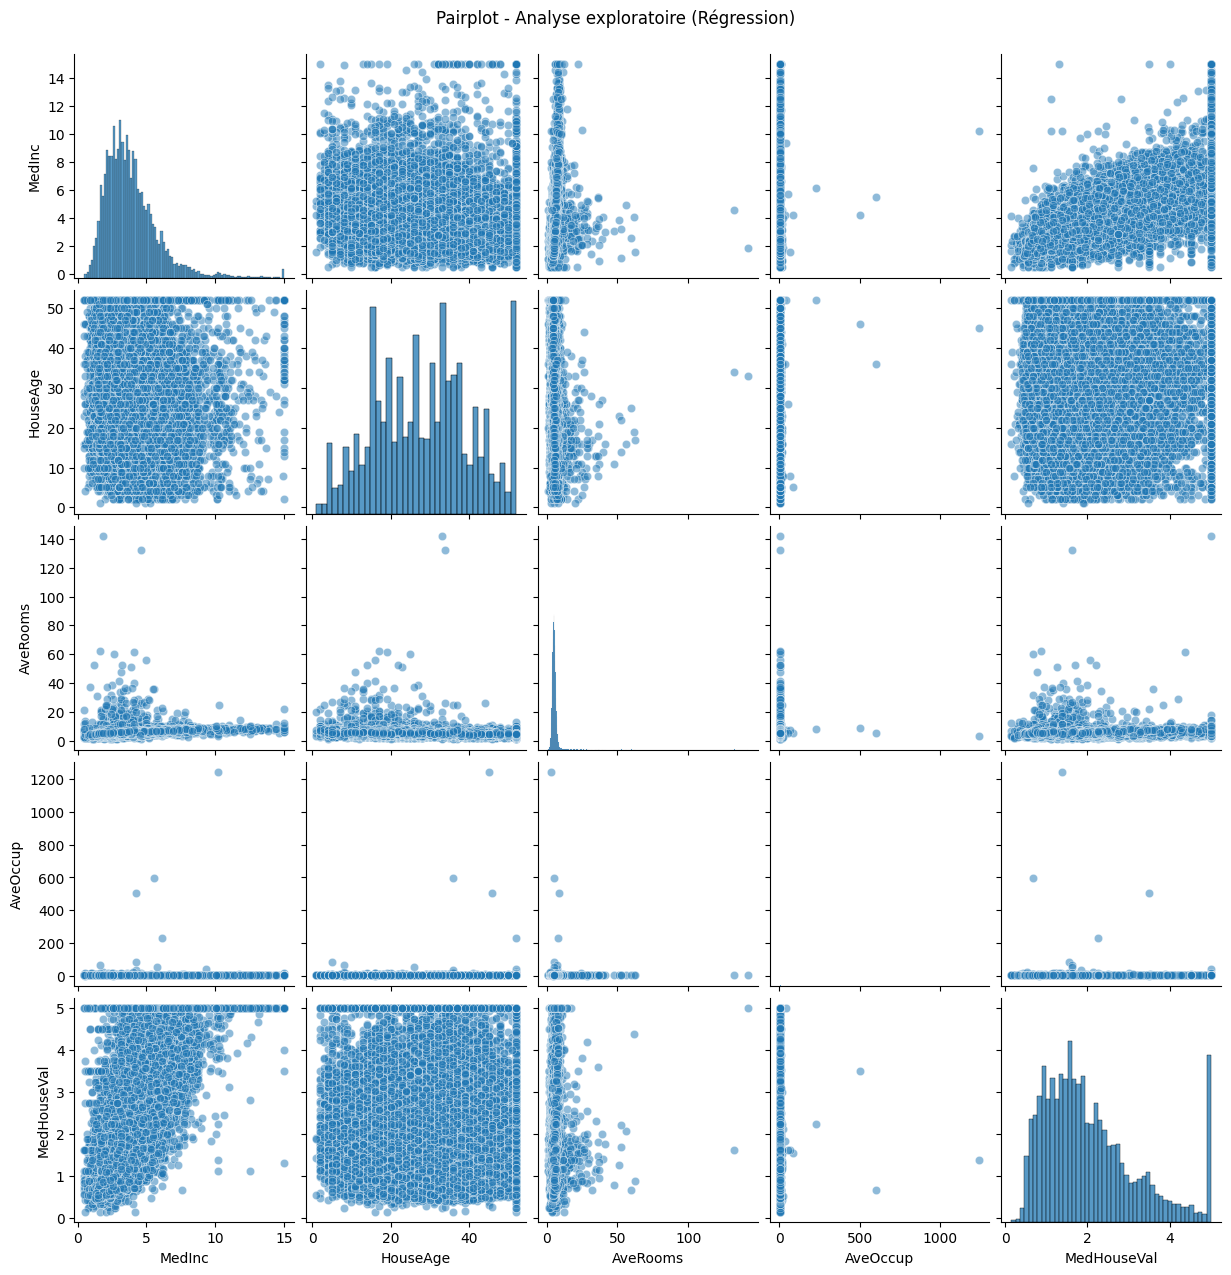

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sélection de quelques variables
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']
sns.pairplot(df[cols], corner=False, diag_kind='hist', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot - Analyse exploratoire (Régression)", y=1.02)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Séparer X (features) et y (target)
X = df.drop(columns=['MedHouseVal'])  # toutes les entrées
y = df['MedHouseVal']                 # la sortie à prédire

 # Split train/test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Vérifications
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("y_train:", y_train.shape, " | y_test:", y_test.shape)


# Initialisez le scaler Min-Max
scaler = MinMaxScaler()

# Appliquez la normalisation Min-Max
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform sur train
X_test_scaled = scaler.transform(X_test)        # transform seulement sur test

print('X_train_scaled', X_train_scaled)
print('X_test_scaled', X_test_scaled)

X_train: (16512, 8)  | X_test: (4128, 8)
y_train: (16512,)  | y_test: (4128,)
X_train_scaled [[1.90321513e-01 6.27450980e-01 2.92778450e-02 ... 2.41381545e-03
  1.70212766e-02 7.29083665e-01]
 [2.28452021e-01 9.41176471e-01 2.54194508e-02 ... 8.41584596e-04
  1.29787234e-01 6.16533865e-01]
 [2.52162039e-01 5.88235294e-02 3.37323616e-02 ... 1.63434697e-03
  2.24468085e-01 3.85458167e-01]
 ...
 [1.67894236e-01 6.86274510e-01 2.19672666e-02 ... 2.12431472e-03
  1.57446809e-01 5.94621514e-01]
 [3.59946759e-01 2.74509804e-01 3.90473129e-02 ... 2.00104707e-03
  5.35106383e-01 2.38047809e-01]
 [1.43142853e-01 1.00000000e+00 1.78250177e-02 ... 1.13982070e-03
  5.55319149e-01 1.92231076e-01]]
X_test_scaled [[8.14678418e-02 4.70588235e-01 2.34243862e-02 ... 2.56319369e-03
  3.73404255e-01 5.31872510e-01]
 [1.40094619e-01 5.68627451e-01 2.94319155e-02 ... 1.59940545e-03
  2.75531915e-01 4.87051793e-01]
 [2.05528200e-01 1.00000000e+00 2.18994569e-02 ... 5.37584539e-04
  5.58510638e-01 1.90239044e-

In [ ]:
# Initialisez le scaler Z-Score
scaler = StandardScaler()

# Appliquez la normalisation Z-Score
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test_scaled)

# (Optionnel) Standardiser y si besoin pour régression
# scaler_y = StandardScaler()
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


# Affichez le DataFrame avec les valeurs standardisées
print('X_train_scaled', X_train_scaled)
print('X_test_scaled', X_test_scaled)

X_train_scaled [[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]
X_test_scaled [[-1.14237625 -0.30073951 -0.43367721 ...  0.52022395  0.22194113
   0.25541734]
 [-0.69050482  0.098724   -0.13050312 ... -0.16293193 -0.20947715
   0.02976613]
 [-0.18616932  1.85636346 -0.51063381 ... -0.91557569  1.03788441
  -1.46454628]
 ...
 [ 2.87008893 -0.30073951  0.65618087 ... -0.09978765  0.80810728
  -1.2689819 ]
 [-0.55565035  0.57808022 -0.04116447 ... -0.21494651  0.5548835
  -0.120668  ]
 [-0.14789765 -0.93988113 -0.50645235 ...  0.43607226 -0.64089543
   0.

# Classification avec le dataset Titanic

## 16. Régression Logistique

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Création et entraînement du modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_standard, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_log = log_reg.predict(X_train_standard)
y_test_pred_log = log_reg.predict(X_test_standard)

# Évaluation des performances
accuracy_train_log = accuracy_score(y_train, y_train_pred_log)
accuracy_test_log = accuracy_score(y_test, y_test_pred_log)
precision_log = precision_score(y_test, y_test_pred_log)
recall_log = recall_score(y_test, y_test_pred_log)
f1_log = f1_score(y_test, y_test_pred_log)

print("Performances de la régression logistique :")
print(f"Précision en entraînement : {accuracy_train_log:.4f}")
print(f"Précision en test : {accuracy_test_log:.4f}")
print(f"Precision (test) : {precision_log:.4f}")
print(f"Recall (test) : {recall_log:.4f}")
print(f"F1-Score (test) : {f1_log:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred_log))

# Matrice de confusion
cm_log = confusion_matrix(y_test, y_test_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - Régression Logistique')
plt.ylabel('Vraies valeurs')
plt.xlabel('Prédictions')
plt.show()

## 17. Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

# Création et entraînement du modèle SVM linéaire
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_standard, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_svm = svm_model.predict(X_train_standard)
y_test_pred_svm = svm_model.predict(X_test_standard)

# Évaluation des performances
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
f1_svm = f1_score(y_test, y_test_pred_svm)

print("Performances du SVM linéaire :")
print(f"Précision en entraînement : {accuracy_train_svm:.4f}")
print(f"Précision en test : {accuracy_test_svm:.4f}")
print(f"Precision (test) : {precision_svm:.4f}")
print(f"Recall (test) : {recall_svm:.4f}")
print(f"F1-Score (test) : {f1_svm:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred_svm))

# Matrice de confusion
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Matrice de Confusion - SVM Linéaire')
plt.ylabel('Vraies valeurs')
plt.xlabel('Prédictions')
plt.show()

## 18. Arbres de Décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Création et entraînement du modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_standard, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_dt = dt_model.predict(X_train_standard)
y_test_pred_dt = dt_model.predict(X_test_standard)

# Évaluation des performances
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)

print("Performances de l'arbre de décision :")
print(f"Précision en entraînement : {accuracy_train_dt:.4f}")
print(f"Précision en test : {accuracy_test_dt:.4f}")
print(f"Precision (test) : {precision_dt:.4f}")
print(f"Recall (test) : {recall_dt:.4f}")
print(f"F1-Score (test) : {f1_dt:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred_dt))

# Matrice de confusion
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title('Matrice de Confusion - Arbre de Décision')
plt.ylabel('Vraies valeurs')
plt.xlabel('Prédictions')
plt.show()

## 19. Forêts Aléatoires (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_standard, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_rf = rf_model.predict(X_train_standard)
y_test_pred_rf = rf_model.predict(X_test_standard)

# Évaluation des performances
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)

print("Performances du Random Forest :")
print(f"Précision en entraînement : {accuracy_train_rf:.4f}")
print(f"Précision en test : {accuracy_test_rf:.4f}")
print(f"Precision (test) : {precision_rf:.4f}")
print(f"Recall (test) : {recall_rf:.4f}")
print(f"F1-Score (test) : {f1_rf:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred_rf))

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.title('Matrice de Confusion - Random Forest')
plt.ylabel('Vraies valeurs')
plt.xlabel('Prédictions')
plt.show()

# Importance des variables
feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.title('Top 10 Features - Random Forest')
plt.tight_layout()
plt.show()

## 20. Comparaison des Modèles de Classification

In [ ]:
# Création d'un tableau comparatif des modèles
comparison_df = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'SVM Linéaire', 'Arbre de Décision', 'Random Forest'],
    'Accuracy (Train)': [accuracy_train_log, accuracy_train_svm, accuracy_train_dt, accuracy_train_rf],
    'Accuracy (Test)': [accuracy_test_log, accuracy_test_svm, accuracy_test_dt, accuracy_test_rf],
    'Precision': [precision_log, precision_svm, precision_dt, precision_rf],
    'Recall': [recall_log, recall_svm, recall_dt, recall_rf],
    'F1-Score': [f1_log, f1_svm, f1_dt, f1_rf]
})

print("=" * 100)
print("COMPARAISON DES MODÈLES DE CLASSIFICATION")
print("=" * 100)
print(comparison_df.to_string(index=False))

# Visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axes[0, 0].bar(comparison_df['Modèle'], comparison_df['Accuracy (Test)'], color=['blue', 'green', 'orange', 'purple'])
axes[0, 0].set_title('Accuracy (Test Set)')
axes[0, 0].set_ylabel('Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim([0, 1])

# Precision
axes[0, 1].bar(comparison_df['Modèle'], comparison_df['Precision'], color=['blue', 'green', 'orange', 'purple'])
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim([0, 1])

# Recall
axes[1, 0].bar(comparison_df['Modèle'], comparison_df['Recall'], color=['blue', 'green', 'orange', 'purple'])
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylabel('Score')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim([0, 1])

# F1-Score
axes[1, 1].bar(comparison_df['Modèle'], comparison_df['F1-Score'], color=['blue', 'green', 'orange', 'purple'])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_ylabel('Score')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Sélectionner le meilleur modèle
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Modèle']
best_f1_score = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\n{'='*50}")
print(f"Meilleur modèle : {best_model_name}")
print(f"F1-Score : {best_f1_score:.4f}")
print(f"{'='*50}")

## 14. Application de la régression linéaire

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Création et entraînement du modèle de régression linéaire
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = linear_reg.predict(X_train_scaled)
y_test_pred = linear_reg.predict(X_test_scaled)

# Évaluation des performances
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Performances de la régression linéaire :")
print(f"MSE sur l'ensemble d'entraînement : {mse_train:.2f}")
print(f"MSE sur l'ensemble de test : {mse_test:.2f}")
print(f"R² sur l'ensemble d'entraînement : {r2_train:.2f}")
print(f"R² sur l'ensemble de test : {r2_test:.2f}")

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Entraînement : Prédictions vs Réelles')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Test : Prédictions vs Réelles')

plt.tight_layout()
plt.show()

## 15. Régression Lasso (avec régularisation L1)

In [ ]:
# Création et entraînement du modèle Lasso avec différentes valeurs d'alpha
alphas = [0.01, 0.1, 1.0, 10.0]
lasso_models = {}
lasso_scores = {'train': [], 'test': []}

print("Comparaison des modèles de régression avec régularisation Lasso :")
print("="*60)

for alpha in alphas:
    # Entraînement du modèle
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_train_scaled, y_train)
    
    # Stockage du modèle
    lasso_models[alpha] = lasso
    
    # Calcul des scores R²
    train_score = lasso.score(X_train_scaled, y_train)
    test_score = lasso.score(X_test_scaled, y_test)
    
    lasso_scores['train'].append(train_score)
    lasso_scores['test'].append(test_score)
    
    # Compter le nombre de coefficients non-nuls (sélection de variables)
    non_zero_coefs = np.sum(lasso.coef_ != 0)
    
    print(f"\nLasso avec alpha = {alpha}")
    print(f"R² sur l'ensemble d'entraînement : {train_score:.3f}")
    print(f"R² sur l'ensemble de test : {test_score:.3f}")
    print(f"Nombre de variables sélectionnées : {non_zero_coefs}")

# Visualisation de l'effet de la régularisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_scores['train'], 'o-', label='Train', color='blue')
plt.plot(alphas, lasso_scores['test'], 'o-', label='Test', color='red')
plt.xscale('log')
plt.xlabel('Alpha (paramètre de régularisation)')
plt.ylabel('Score R²')
plt.title('Impact de la régularisation Lasso sur les performances')
plt.legend()
plt.grid(True)

# Visualisation du nombre de variables sélectionnées
plt.subplot(1, 2, 2)
n_features = [np.sum(lasso_models[alpha].coef_ != 0) for alpha in alphas]
plt.plot(alphas, n_features, 'o-', color='green')
plt.xscale('log')
plt.xlabel('Alpha (paramètre de régularisation)')
plt.ylabel('Nombre de variables sélectionnées')
plt.title('Sélection de variables par Lasso')
plt.grid(True)

plt.tight_layout()
plt.show()

# Sélection du meilleur modèle Lasso (basé sur les scores de test)
best_alpha = alphas[np.argmax(lasso_scores['test'])]
best_lasso = lasso_models[best_alpha]

print(f"\nMeilleur modèle Lasso (alpha = {best_alpha}):")
print(f"R² sur l'ensemble de test : {max(lasso_scores['test']):.3f}")
print(f"Nombre de variables sélectionnées : {np.sum(best_lasso.coef_ != 0)}")

# Comparaison avec la régression linéaire simple
print(f"\nComparaison avec la régression linéaire simple :")
print(f"R² Régression linéaire : {r2_test:.3f}")
print(f"R² Meilleur Lasso : {max(lasso_scores['test']):.3f}")
print(f"Amélioration : {max(lasso_scores['test']) - r2_test:.3f}")

In [ ]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test (80% - 20%)
train_data, test_data = train_test_split(df_sans_nan, test_size=0.2, random_state=42)

# Affichage du nombre de lignes dans chaque ensemble
print("Nombre de lignes dans l'ensemble d'entraînement :", len(train_data))
print("Nombre de lignes dans l'ensemble de test :", len(test_data))


Nombre de lignes dans l'ensemble d'entraînement : 16512
Nombre de lignes dans l'ensemble de test : 4128


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# 1. Charger le dataset Adult
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame
df.head()




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# 2. Label Encoding sur 'sex'
le = LabelEncoder()
df['sex_label'] = le.fit_transform(df['sex'])
#  Supprimer la colonne originale 'sex'
df = df.drop(columns=['sex'])

# 3. One-Hot Encoding sur quelques colonnes catégorielles
cols_to_encode = ['workclass', 'education', 'marital-status']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_array = ohe.fit_transform(df[cols_to_encode])
onehot_df = pd.DataFrame(onehot_array, columns=ohe.get_feature_names_out(cols_to_encode))

# 4. Fusionner avec le dataset original (en supprimant les colonnes encodées)
df_encoded = pd.concat([df.drop(columns=cols_to_encode), onehot_df], axis=1)

#  Aperçu final
df_encoded.head()

,age,fnlwgt,education-num,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,...,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,226802,7,Machine-op-inspct,Own-child,Black,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,Farming-fishing,Husband,White,0,0,50,United-States,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28,336951,12,Protective-serv,Husband,White,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,44,160323,10,Machine-op-inspct,Husband,Black,7688,0,40,United-States,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,18,103497,10,NaN,Own-child,White,0,0,30,United-States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_encoded[['sex_label']].head()

,sex_label
0,1
1,1
2,1
3,1
4,0


# Part 2: RÉGRESSION - Dataset California Housing

## 21. Chargement et préparation du dataset California Housing

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Charger le dataset California Housing
housing_data = fetch_california_housing(as_frame=True)
df_housing = housing_data.frame

print("Dataset California Housing :")
print(f"Shape : {df_housing.shape}")
print("\nAperçu des données :")
print(df_housing.head())
print("\nInformations :")
print(df_housing.info())
print("\nStatistiques descriptives :")
print(df_housing.describe())


## 22. Prétraitement et division train/test

In [ ]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
print(df_housing.isnull().sum())

# Supprimer les valeurs manquantes si existantes
df_housing = df_housing.dropna()

# Séparer X et y
X_housing = df_housing.drop('MedHouseVal', axis=1)
y_housing = df_housing['MedHouseVal']

# Division train/test (80/20)
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Standardisation
scaler_housing = StandardScaler()
X_train_housing_scaled = scaler_housing.fit_transform(X_train_housing)
X_test_housing_scaled = scaler_housing.transform(X_test_housing)

print(f"\nShape X_train : {X_train_housing_scaled.shape}")
print(f"Shape X_test : {X_test_housing_scaled.shape}")
print(f"Shape y_train : {y_train_housing.shape}")
print(f"Shape y_test : {y_test_housing.shape}")


## 23. Régression Linéaire

In [ ]:
# Création et entraînement du modèle
lr_housing = LinearRegression()
lr_housing.fit(X_train_housing_scaled, y_train_housing)

# Prédictions
y_pred_train_lr = lr_housing.predict(X_train_housing_scaled)
y_pred_test_lr = lr_housing.predict(X_test_housing_scaled)

# Évaluation
mse_train_lr = mean_squared_error(y_train_housing, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test_housing, y_pred_test_lr)
mae_train_lr = mean_absolute_error(y_train_housing, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test_housing, y_pred_test_lr)
r2_train_lr = r2_score(y_train_housing, y_pred_train_lr)
r2_test_lr = r2_score(y_test_housing, y_pred_test_lr)

print("=" * 60)
print("RÉGRESSION LINÉAIRE - California Housing")
print("=" * 60)
print(f"MSE (Train) : {mse_train_lr:.4f} | MSE (Test) : {mse_test_lr:.4f}")
print(f"MAE (Train) : {mae_train_lr:.4f} | MAE (Test) : {mae_test_lr:.4f}")
print(f"R² (Train) : {r2_train_lr:.4f} | R² (Test) : {r2_test_lr:.4f}")

# Visualisation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_train_housing, y_pred_train_lr, alpha=0.5, s=10)
plt.plot([y_train_housing.min(), y_train_housing.max()], 
         [y_train_housing.min(), y_train_housing.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Train Set - Régression Linéaire')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test_housing, y_pred_test_lr, alpha=0.5, s=10, color='orange')
plt.plot([y_test_housing.min(), y_test_housing.max()], 
         [y_test_housing.min(), y_test_housing.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Test Set - Régression Linéaire')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 24. Ridge Regression

In [ ]:
# Test de différentes valeurs d'alpha
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = {'alpha': [], 'mse_train': [], 'mse_test': [], 'r2_train': [], 'r2_test': []}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_housing_scaled, y_train_housing)
    
    y_pred_train = ridge.predict(X_train_housing_scaled)
    y_pred_test = ridge.predict(X_test_housing_scaled)
    
    ridge_results['alpha'].append(alpha)
    ridge_results['mse_train'].append(mean_squared_error(y_train_housing, y_pred_train))
    ridge_results['mse_test'].append(mean_squared_error(y_test_housing, y_pred_test))
    ridge_results['r2_train'].append(r2_score(y_train_housing, y_pred_train))
    ridge_results['r2_test'].append(r2_score(y_test_housing, y_pred_test))

# Afficher les résultats
ridge_df = pd.DataFrame(ridge_results)
print("=" * 80)
print("RIDGE REGRESSION - California Housing")
print("=" * 80)
print(ridge_df.to_string(index=False))

# Utiliser le meilleur modèle Ridge
best_alpha_ridge = ridge_df.loc[ridge_df['mse_test'].idxmin(), 'alpha']
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_housing_scaled, y_train_housing)
y_pred_test_ridge = ridge_best.predict(X_test_housing_scaled)
mse_test_ridge = mean_squared_error(y_test_housing, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test_housing, y_pred_test_ridge)

print(f"\nMeilleur alpha : {best_alpha_ridge}")
print(f"MSE (Test) : {mse_test_ridge:.4f} | R² (Test) : {r2_test_ridge:.4f}")

# Visualisation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.semilogx(ridge_df['alpha'], ridge_df['mse_train'], 'o-', label='Train MSE')
plt.semilogx(ridge_df['alpha'], ridge_df['mse_test'], 's-', label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression - MSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(ridge_df['alpha'], ridge_df['r2_train'], 'o-', label='Train R²')
plt.semilogx(ridge_df['alpha'], ridge_df['r2_test'], 's-', label='Test R²')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Ridge Regression - R² vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 25. Lasso Regression

In [ ]:
# Test de différentes valeurs d'alpha pour Lasso
alphas_lasso = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
lasso_results = {'alpha': [], 'mse_train': [], 'mse_test': [], 'r2_train': [], 'r2_test': [], 'n_features': []}

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_train_housing_scaled, y_train_housing)
    
    y_pred_train = lasso.predict(X_train_housing_scaled)
    y_pred_test = lasso.predict(X_test_housing_scaled)
    
    lasso_results['alpha'].append(alpha)
    lasso_results['mse_train'].append(mean_squared_error(y_train_housing, y_pred_train))
    lasso_results['mse_test'].append(mean_squared_error(y_test_housing, y_pred_test))
    lasso_results['r2_train'].append(r2_score(y_train_housing, y_pred_train))
    lasso_results['r2_test'].append(r2_score(y_test_housing, y_pred_test))
    lasso_results['n_features'].append(np.sum(lasso.coef_ != 0))

# Afficher les résultats
lasso_df = pd.DataFrame(lasso_results)
print("=" * 100)
print("LASSO REGRESSION - California Housing")
print("=" * 100)
print(lasso_df.to_string(index=False))

# Utiliser le meilleur modèle Lasso
best_alpha_lasso = lasso_df.loc[lasso_df['mse_test'].idxmin(), 'alpha']
lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=1000)
lasso_best.fit(X_train_housing_scaled, y_train_housing)
y_pred_test_lasso = lasso_best.predict(X_test_housing_scaled)
mse_test_lasso = mean_squared_error(y_test_housing, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test_housing, y_pred_test_lasso)

print(f"\nMeilleur alpha : {best_alpha_lasso}")
print(f"MSE (Test) : {mse_test_lasso:.4f} | R² (Test) : {r2_test_lasso:.4f}")

# Visualisation
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.semilogx(lasso_df['alpha'], lasso_df['mse_train'], 'o-', label='Train MSE')
plt.semilogx(lasso_df['alpha'], lasso_df['mse_test'], 's-', label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression - MSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.semilogx(lasso_df['alpha'], lasso_df['r2_train'], 'o-', label='Train R²')
plt.semilogx(lasso_df['alpha'], lasso_df['r2_test'], 's-', label='Test R²')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Lasso Regression - R² vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.semilogx(lasso_df['alpha'], lasso_df['n_features'], 'o-', color='green')
plt.xlabel('Alpha')
plt.ylabel('Nombre de features non-zéro')
plt.title('Lasso - Sélection de variables')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 26. Polynomial Regression

In [ ]:
# Test de différents degrés polynomiaux
degrees = [1, 2, 3]
poly_results = {'degree': [], 'mse_train': [], 'mse_test': [], 'r2_train': [], 'r2_test': [], 'n_features': []}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_housing_scaled)
    X_test_poly = poly.transform(X_test_housing_scaled)
    
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train_housing)
    
    y_pred_train = lr_poly.predict(X_train_poly)
    y_pred_test = lr_poly.predict(X_test_poly)
    
    poly_results['degree'].append(degree)
    poly_results['mse_train'].append(mean_squared_error(y_train_housing, y_pred_train))
    poly_results['mse_test'].append(mean_squared_error(y_test_housing, y_pred_test))
    poly_results['r2_train'].append(r2_score(y_train_housing, y_pred_train))
    poly_results['r2_test'].append(r2_score(y_test_housing, y_pred_test))
    poly_results['n_features'].append(X_train_poly.shape[1])

# Afficher les résultats
poly_df = pd.DataFrame(poly_results)
print("=" * 90)
print("POLYNOMIAL REGRESSION - California Housing")
print("=" * 90)
print(poly_df.to_string(index=False))

# Utiliser le meilleur modèle Polynomial
best_degree = poly_df.loc[poly_df['mse_test'].idxmin(), 'degree']
poly_best_obj = PolynomialFeatures(degree=int(best_degree), include_bias=False)
X_train_poly_best = poly_best_obj.fit_transform(X_train_housing_scaled)
X_test_poly_best = poly_best_obj.transform(X_test_housing_scaled)
lr_poly_best = LinearRegression()
lr_poly_best.fit(X_train_poly_best, y_train_housing)
y_pred_test_poly = lr_poly_best.predict(X_test_poly_best)
mse_test_poly = mean_squared_error(y_test_housing, y_pred_test_poly)
r2_test_poly = r2_score(y_test_housing, y_pred_test_poly)

print(f"\nMeilleur degré : {best_degree}")
print(f"MSE (Test) : {mse_test_poly:.4f} | R² (Test) : {r2_test_poly:.4f}")

# Visualisation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(poly_df['degree'], poly_df['mse_train'], 'o-', label='Train MSE')
plt.plot(poly_df['degree'], poly_df['mse_test'], 's-', label='Test MSE')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression - MSE vs Degree')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(poly_df['degree'], poly_df['r2_train'], 'o-', label='Train R²')
plt.plot(poly_df['degree'], poly_df['r2_test'], 's-', label='Test R²')
plt.xlabel('Degree')
plt.ylabel('R² Score')
plt.title('Polynomial Regression - R² vs Degree')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 27. K-Nearest Neighbors Regression

In [ ]:
# Test de différentes valeurs de k
k_values = [3, 5, 7, 10, 15, 20]
knn_results = {'k': [], 'mse_train': [], 'mse_test': [], 'r2_train': [], 'r2_test': []}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_housing_scaled, y_train_housing)
    
    y_pred_train = knn.predict(X_train_housing_scaled)
    y_pred_test = knn.predict(X_test_housing_scaled)
    
    knn_results['k'].append(k)
    knn_results['mse_train'].append(mean_squared_error(y_train_housing, y_pred_train))
    knn_results['mse_test'].append(mean_squared_error(y_test_housing, y_pred_test))
    knn_results['r2_train'].append(r2_score(y_train_housing, y_pred_train))
    knn_results['r2_test'].append(r2_score(y_test_housing, y_pred_test))

# Afficher les résultats
knn_df = pd.DataFrame(knn_results)
print("=" * 85)
print("KNN REGRESSION - California Housing")
print("=" * 85)
print(knn_df.to_string(index=False))

# Utiliser le meilleur modèle KNN
best_k = knn_df.loc[knn_df['mse_test'].idxmin(), 'k']
knn_best = KNeighborsRegressor(n_neighbors=int(best_k))
knn_best.fit(X_train_housing_scaled, y_train_housing)
y_pred_test_knn = knn_best.predict(X_test_housing_scaled)
mse_test_knn = mean_squared_error(y_test_housing, y_pred_test_knn)
r2_test_knn = r2_score(y_test_housing, y_pred_test_knn)

print(f"\nMeilleur k : {best_k}")
print(f"MSE (Test) : {mse_test_knn:.4f} | R² (Test) : {r2_test_knn:.4f}")

# Visualisation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(knn_df['k'], knn_df['mse_train'], 'o-', label='Train MSE')
plt.plot(knn_df['k'], knn_df['mse_test'], 's-', label='Test MSE')
plt.xlabel('k (nombre de voisins)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression - MSE vs k')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(knn_df['k'], knn_df['r2_train'], 'o-', label='Train R²')
plt.plot(knn_df['k'], knn_df['r2_test'], 's-', label='Test R²')
plt.xlabel('k (nombre de voisins)')
plt.ylabel('R² Score')
plt.title('KNN Regression - R² vs k')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 28. Comparaison des modèles de régression

In [ ]:
# Comparaison des modèles
comparison_housing = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Ridge (α=' + str(best_alpha_ridge) + ')', 
               'Lasso (α=' + str(best_alpha_lasso) + ')', 'Polynomial (deg=' + str(int(best_degree)) + ')',
               'KNN (k=' + str(int(best_k)) + ')'],
    'MSE (Test)': [mse_test_lr, mse_test_ridge, mse_test_lasso, mse_test_poly, mse_test_knn],
    'MAE (Test)': [mean_absolute_error(y_test_housing, lr_housing.predict(X_test_housing_scaled)),
                    mean_absolute_error(y_test_housing, ridge_best.predict(X_test_housing_scaled)),
                    mean_absolute_error(y_test_housing, lasso_best.predict(X_test_housing_scaled)),
                    mean_absolute_error(y_test_housing, lr_poly_best.predict(X_test_poly_best)),
                    mean_absolute_error(y_test_housing, knn_best.predict(X_test_housing_scaled))],
    'R² (Test)': [r2_test_lr, r2_test_ridge, r2_test_lasso, r2_test_poly, r2_test_knn]
})

print("=" * 100)
print("COMPARAISON DES MODÈLES DE RÉGRESSION - California Housing")
print("=" * 100)
print(comparison_housing.to_string(index=False))

# Visualisation comparative
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = comparison_housing['Modèle'].tolist()
colors = ['blue', 'green', 'orange', 'red', 'purple']

# MSE
axes[0].barh(models, comparison_housing['MSE (Test)'], color=colors)
axes[0].set_xlabel('Mean Squared Error')
axes[0].set_title('Comparaison MSE (Test Set)')
axes[0].grid(True, alpha=0.3, axis='x')

# MAE
axes[1].barh(models, comparison_housing['MAE (Test)'], color=colors)
axes[1].set_xlabel('Mean Absolute Error')
axes[1].set_title('Comparaison MAE (Test Set)')
axes[1].grid(True, alpha=0.3, axis='x')

# R²
axes[2].barh(models, comparison_housing['R² (Test)'], color=colors)
axes[2].set_xlabel('R² Score')
axes[2].set_title('Comparaison R² (Test Set)')
axes[2].set_xlim([0, 1])
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Meilleur modèle
best_model_idx = comparison_housing['R² (Test)'].idxmax()
best_model_name = comparison_housing.loc[best_model_idx, 'Modèle']
best_r2 = comparison_housing.loc[best_model_idx, 'R² (Test)']

print(f"\n{'='*50}")
print(f"Meilleur modèle (basé sur R²) : {best_model_name}")
print(f"R² Score : {best_r2:.4f}")
print(f"{'='*50}")


# Part 3: CLASSIFICATION - Dataset Titanic

## 29. Charger et préparer le dataset Titanic

In [ ]:
# Recharger le dataset Titanic pour la classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

titanic_data = fetch_openml(name='titanic', version=1, as_frame=True)
df_titanic = titanic_data.frame

print("Dataset Titanic :")
print(f"Shape : {df_titanic.shape}")
print("\nAperçu des données :")
print(df_titanic.head())

# Sélectionner les colonnes utiles
features_titanic = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']
available_features_titanic = [col for col in features_titanic if col in df_titanic.columns]
df_titanic = df_titanic[available_features_titanic].copy()

print(f"\nColonnes sélectionnées : {df_titanic.columns.tolist()}")
print(f"Shape après sélection : {df_titanic.shape}")


## 30. Nettoyage et encodage du dataset Titanic

In [ ]:
# Supprimer les valeurs manquantes
df_titanic = df_titanic.dropna()

# Identifier colonnes numériques et catégorielles
numeric_cols_titanic = df_titanic.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_titanic = df_titanic.select_dtypes(include=['object', 'category']).columns.tolist()

# Encoder la variable cible
if 'survived' in df_titanic.columns:
    if df_titanic['survived'].dtype == 'object':
        le_target = LabelEncoder()
        df_titanic['survived'] = le_target.fit_transform(df_titanic['survived'])

print("Valeurs manquantes :")
print(df_titanic.isnull().sum())

print(f"\nColonnes numériques : {numeric_cols_titanic}")
print(f"Colonnes catégorielles : {categorical_cols_titanic}")

# One-Hot Encoding pour les colonnes catégorielles (sauf la cible)
if 'survived' in numeric_cols_titanic:
    numeric_cols_titanic.remove('survived')

categorical_to_encode = [col for col in categorical_cols_titanic if col != 'survived']

if len(categorical_to_encode) > 0:
    df_titanic = pd.get_dummies(df_titanic, columns=categorical_to_encode, drop_first=True)

print(f"\nShape après encodage : {df_titanic.shape}")
print(f"\nColonnes finales : {df_titanic.columns.tolist()}")

# Séparer X et y
X_titanic = df_titanic.drop('survived', axis=1)
y_titanic = df_titanic['survived']

print(f"\nShape X : {X_titanic.shape}")
print(f"Shape y : {y_titanic.shape}")
print(f"Distribution y : \n{y_titanic.value_counts()}")


## 31. Division train/test et normalisation

In [ ]:
# Division train/test (80/20) avec stratification
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42, stratify=y_titanic
)

# Standardisation
scaler_titanic = StandardScaler()
X_train_titanic_scaled = scaler_titanic.fit_transform(X_train_titanic)
X_test_titanic_scaled = scaler_titanic.transform(X_test_titanic)

print(f"Shape X_train : {X_train_titanic_scaled.shape}")
print(f"Shape X_test : {X_test_titanic_scaled.shape}")
print(f"Shape y_train : {y_train_titanic.shape}")
print(f"Shape y_test : {y_test_titanic.shape}")
print(f"\nDistribution y_train : \n{y_train_titanic.value_counts()}")
print(f"\nDistribution y_test : \n{y_test_titanic.value_counts()}")


## 32. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_titanic_scaled, y_train_titanic)

# Prédictions
y_pred_train_lr = lr_clf.predict(X_train_titanic_scaled)
y_pred_test_lr = lr_clf.predict(X_test_titanic_scaled)

# Évaluation
acc_train_lr = accuracy_score(y_train_titanic, y_pred_train_lr)
acc_test_lr = accuracy_score(y_test_titanic, y_pred_test_lr)
prec_lr = precision_score(y_test_titanic, y_pred_test_lr)
rec_lr = recall_score(y_test_titanic, y_pred_test_lr)
f1_lr = f1_score(y_test_titanic, y_pred_test_lr)

print("=" * 70)
print("LOGISTIC REGRESSION - Titanic")
print("=" * 70)
print(f"Accuracy (Train) : {acc_train_lr:.4f} | Accuracy (Test) : {acc_test_lr:.4f}")
print(f"Precision (Test) : {prec_lr:.4f}")
print(f"Recall (Test) : {rec_lr:.4f}")
print(f"F1-Score (Test) : {f1_lr:.4f}")
print("\nClassification Report :")
print(classification_report(y_test_titanic, y_pred_test_lr))

# Matrice de confusion
cm_lr = confusion_matrix(y_test_titanic, y_pred_test_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matrice de Confusion - Logistic Regression')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


## 33. Support Vector Machines (SVM)

In [ ]:
# Création et entraînement
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_titanic_scaled, y_train_titanic)

# Prédictions
y_pred_train_svm = svm_clf.predict(X_train_titanic_scaled)
y_pred_test_svm = svm_clf.predict(X_test_titanic_scaled)

# Évaluation
acc_train_svm = accuracy_score(y_train_titanic, y_pred_train_svm)
acc_test_svm = accuracy_score(y_test_titanic, y_pred_test_svm)
prec_svm = precision_score(y_test_titanic, y_pred_test_svm)
rec_svm = recall_score(y_test_titanic, y_pred_test_svm)
f1_svm = f1_score(y_test_titanic, y_pred_test_svm)

print("=" * 70)
print("SUPPORT VECTOR MACHINES (SVM) - Titanic")
print("=" * 70)
print(f"Accuracy (Train) : {acc_train_svm:.4f} | Accuracy (Test) : {acc_test_svm:.4f}")
print(f"Precision (Test) : {prec_svm:.4f}")
print(f"Recall (Test) : {rec_svm:.4f}")
print(f"F1-Score (Test) : {f1_svm:.4f}")
print("\nClassification Report :")
print(classification_report(y_test_titanic, y_pred_test_svm))

# Matrice de confusion
cm_svm = confusion_matrix(y_test_titanic, y_pred_test_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Matrice de Confusion - SVM')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


## 34. Decision Trees

In [ ]:
# Création et entraînement
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train_titanic_scaled, y_train_titanic)

# Prédictions
y_pred_train_dt = dt_clf.predict(X_train_titanic_scaled)
y_pred_test_dt = dt_clf.predict(X_test_titanic_scaled)

# Évaluation
acc_train_dt = accuracy_score(y_train_titanic, y_pred_train_dt)
acc_test_dt = accuracy_score(y_test_titanic, y_pred_test_dt)
prec_dt = precision_score(y_test_titanic, y_pred_test_dt)
rec_dt = recall_score(y_test_titanic, y_pred_test_dt)
f1_dt = f1_score(y_test_titanic, y_pred_test_dt)

print("=" * 70)
print("DECISION TREES - Titanic")
print("=" * 70)
print(f"Accuracy (Train) : {acc_train_dt:.4f} | Accuracy (Test) : {acc_test_dt:.4f}")
print(f"Precision (Test) : {prec_dt:.4f}")
print(f"Recall (Test) : {rec_dt:.4f}")
print(f"F1-Score (Test) : {f1_dt:.4f}")
print("\nClassification Report :")
print(classification_report(y_test_titanic, y_pred_test_dt))

# Matrice de confusion
cm_dt = confusion_matrix(y_test_titanic, y_pred_test_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Matrice de Confusion - Decision Trees')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


## 35. Random Forest Classifier

In [ ]:
# Création et entraînement
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train_titanic_scaled, y_train_titanic)

# Prédictions
y_pred_train_rf = rf_clf.predict(X_train_titanic_scaled)
y_pred_test_rf = rf_clf.predict(X_test_titanic_scaled)

# Évaluation
acc_train_rf = accuracy_score(y_train_titanic, y_pred_train_rf)
acc_test_rf = accuracy_score(y_test_titanic, y_pred_test_rf)
prec_rf = precision_score(y_test_titanic, y_pred_test_rf)
rec_rf = recall_score(y_test_titanic, y_pred_test_rf)
f1_rf = f1_score(y_test_titanic, y_pred_test_rf)

print("=" * 70)
print("RANDOM FOREST - Titanic")
print("=" * 70)
print(f"Accuracy (Train) : {acc_train_rf:.4f} | Accuracy (Test) : {acc_test_rf:.4f}")
print(f"Precision (Test) : {prec_rf:.4f}")
print(f"Recall (Test) : {rec_rf:.4f}")
print(f"F1-Score (Test) : {f1_rf:.4f}")
print("\nClassification Report :")
print(classification_report(y_test_titanic, y_pred_test_rf))

# Matrice de confusion
cm_rf = confusion_matrix(y_test_titanic, y_pred_test_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('Matrice de Confusion - Random Forest')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


## 36. K-Nearest Neighbors Classification

In [ ]:
# Test de différentes valeurs de k
knn_k_values = [3, 5, 7, 10, 15]
best_k_clf = 5
best_acc = 0

for k in knn_k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_titanic_scaled, y_train_titanic)
    acc = accuracy_score(y_test_titanic, knn_clf.predict(X_test_titanic_scaled))
    if acc > best_acc:
        best_acc = acc
        best_k_clf = k

knn_clf = KNeighborsClassifier(n_neighbors=best_k_clf)
knn_clf.fit(X_train_titanic_scaled, y_train_titanic)

# Prédictions
y_pred_train_knn = knn_clf.predict(X_train_titanic_scaled)
y_pred_test_knn = knn_clf.predict(X_test_titanic_scaled)

# Évaluation
acc_train_knn = accuracy_score(y_train_titanic, y_pred_train_knn)
acc_test_knn = accuracy_score(y_test_titanic, y_pred_test_knn)
prec_knn = precision_score(y_test_titanic, y_pred_test_knn)
rec_knn = recall_score(y_test_titanic, y_pred_test_knn)
f1_knn = f1_score(y_test_titanic, y_pred_test_knn)

print("=" * 70)
print("K-NEAREST NEIGHBORS - Titanic")
print("=" * 70)
print(f"Meilleur k : {best_k_clf}")
print(f"Accuracy (Train) : {acc_train_knn:.4f} | Accuracy (Test) : {acc_test_knn:.4f}")
print(f"Precision (Test) : {prec_knn:.4f}")
print(f"Recall (Test) : {rec_knn:.4f}")
print(f"F1-Score (Test) : {f1_knn:.4f}")
print("\nClassification Report :")
print(classification_report(y_test_titanic, y_pred_test_knn))

# Matrice de confusion
cm_knn = confusion_matrix(y_test_titanic, y_pred_test_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='YlOrRd', cbar=True)
plt.title('Matrice de Confusion - KNN')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


## 37. Comparaison des modèles de classification

In [ ]:
# Comparaison des modèles de classification
comparison_clf = pd.DataFrame({
    'Modèle': ['Logistic Regression', 'SVM (RBF)', 'Decision Trees', 'Random Forest', 'KNN (k=' + str(best_k_clf) + ')'],
    'Accuracy (Test)': [acc_test_lr, acc_test_svm, acc_test_dt, acc_test_rf, acc_test_knn],
    'Precision (Test)': [prec_lr, prec_svm, prec_dt, prec_rf, prec_knn],
    'Recall (Test)': [rec_lr, rec_svm, rec_dt, rec_rf, rec_knn],
    'F1-Score (Test)': [f1_lr, f1_svm, f1_dt, f1_rf, f1_knn]
})

print("=" * 105)
print("COMPARAISON DES MODÈLES DE CLASSIFICATION - Titanic")
print("=" * 105)
print(comparison_clf.to_string(index=False))

# Visualisation comparative
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

models = comparison_clf['Modèle'].tolist()
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Accuracy
axes[0].barh(models, comparison_clf['Accuracy (Test)'], color=colors)
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Comparaison Accuracy')
axes[0].set_xlim([0, 1])
axes[0].grid(True, alpha=0.3, axis='x')

# Precision
axes[1].barh(models, comparison_clf['Precision (Test)'], color=colors)
axes[1].set_xlabel('Precision')
axes[1].set_title('Comparaison Precision')
axes[1].set_xlim([0, 1])
axes[1].grid(True, alpha=0.3, axis='x')

# Recall
axes[2].barh(models, comparison_clf['Recall (Test)'], color=colors)
axes[2].set_xlabel('Recall')
axes[2].set_title('Comparaison Recall')
axes[2].set_xlim([0, 1])
axes[2].grid(True, alpha=0.3, axis='x')

# F1-Score
axes[3].barh(models, comparison_clf['F1-Score (Test)'], color=colors)
axes[3].set_xlabel('F1-Score')
axes[3].set_title('Comparaison F1-Score')
axes[3].set_xlim([0, 1])
axes[3].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Meilleur modèle
best_clf_idx = comparison_clf['F1-Score (Test)'].idxmax()
best_clf_name = comparison_clf.loc[best_clf_idx, 'Modèle']
best_f1_clf = comparison_clf.loc[best_clf_idx, 'F1-Score (Test)']

print(f"\n{'='*50}")
print(f"Meilleur modèle (basé sur F1-Score) : {best_clf_name}")
print(f"F1-Score : {best_f1_clf:.4f}")
print(f"{'='*50}")


# Part 4: DIMENSIONALITY REDUCTION & CLUSTERING - Dataset Titanic

## 38. Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

# Appliquer PCA avec tous les composantes pour voir la variance expliquée
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_titanic_scaled)

# Variance expliquée cumulée
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

print("=" * 70)
print("PRINCIPAL COMPONENT ANALYSIS (PCA) - Titanic")
print("=" * 70)
print(f"\nNombre de features originales : {X_titanic_scaled.shape[1]}")
print(f"\nVariance expliquée par chaque composante :")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1} : {var:.4f} ({cumsum_var[i]:.4f} cumulative)")

# Appliquer PCA avec 2 et 3 composantes pour la visualisation
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_titanic_scaled)

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_titanic_scaled)

print(f"\n\nPCA avec 2 composantes :")
print(f"Variance totale expliquée : {pca_2.explained_variance_ratio_.sum():.4f}")

print(f"\nPCA avec 3 composantes :")
print(f"Variance totale expliquée : {pca_3.explained_variance_ratio_.sum():.4f}")

# Visualisation de la variance expliquée
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Variance par composante
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Composante Principale')
axes[0].set_ylabel('Variance Expliquée')
axes[0].set_title('Variance expliquée par chaque composante')
axes[0].grid(True, alpha=0.3)

# Variance cumulée
axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, 'o-', color='darkgreen', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].set_xlabel('Nombre de Composantes')
axes[1].set_ylabel('Variance Expliquée Cumulée')
axes[1].set_title('Variance cumulée')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_titanic, cmap='viridis', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA - Projection 2D du dataset Titanic')
plt.colorbar(scatter, label='Survived')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 39. K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Déterminer le nombre optimal de clusters avec la méthode du coude
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_titanic_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_titanic_scaled, kmeans.labels_))

print("=" * 70)
print("K-MEANS CLUSTERING - Titanic")
print("=" * 70)
print(f"\nInertie pour différentes valeurs de k :")
for k, inertia, sil_score in zip(K_range, inertias, silhouette_scores):
    print(f"k={k} : Inertia={inertia:.2f}, Silhouette={sil_score:.4f}")

# Utiliser k=2 (2 clusters) comme optimal
optimal_k = 2
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_titanic_scaled)

print(f"\n\nK-Means avec k={optimal_k} :")
print(f"Silhouette Score : {silhouette_score(X_titanic_scaled, clusters):.4f}")
print(f"Distribution des clusters :")
unique, counts = np.unique(clusters, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Cluster {u} : {c} passagers ({c/len(clusters)*100:.1f}%)")

# Visualisation - Méthode du coude
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'o-', linewidth=2, color='steelblue')
axes[0].set_xlabel('Nombre de clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Méthode du Coude')
axes[0].grid(True, alpha=0.3)

# Silhouette score
axes[1].plot(K_range, silhouette_scores, 'o-', linewidth=2, color='darkgreen')
axes[1].set_xlabel('Nombre de clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score par k')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation des clusters en 2D (utilisant PCA)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters, cmap='coolwarm', 
                      s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
# Afficher les centroïdes
centroids_pca = pca_2.transform(kmeans_optimal.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='yellow', marker='X', 
           s=300, edgecolors='black', linewidth=2, label='Centroids')
plt.xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'K-Means Clustering (k={optimal_k}) - Projection PCA 2D')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 40. Conclusion et Résumé

## Résumé du Notebook

Ce notebook a démontré une analyse complète de machine learning avec les points clés suivants :

### **Part 1 : Prétraitement Titanic**
- Chargement et exploration du dataset
- Nettoyage des données manquantes
- Encodage des variables catégorielles
- Division train/test avec stratification
- Normalisation des données

### **Part 2 : Régression - California Housing**
5 algorithmes appliqués et comparés :
1. **Régression Linéaire** : Modèle de base simple
2. **Ridge Regression** : Régularisation L2 pour éviter l'overfitting
3. **Lasso Regression** : Régularisation L1 avec sélection de variables
4. **Polynomial Regression** : Capture des relations non-linéaires
5. **K-Nearest Neighbors** : Approche basée sur les distances

**Metriques** : MSE, MAE, R² Score

### **Part 3 : Classification - Titanic**
5 algorithmes appliqués et comparés :
1. **Logistic Regression** : Classification linéaire probabiliste
2. **Support Vector Machines (SVM)** : Maximisation de la marge
3. **Decision Trees** : Arbres de décision
4. **Random Forest** : Ensemble d'arbres
5. **K-Nearest Neighbors** : Classification par voisinage

**Metriques** : Accuracy, Precision, Recall, F1-Score, Confusion Matrix

### **Part 4 : Réduction de Dimension et Clustering**
1. **Principal Component Analysis (PCA)** :
   - Réduction de dimensionnalité
   - Visualisation des données en 2D/3D
   - Analyse de la variance expliquée

2. **K-Means Clustering** :
   - Détermination du nombre optimal de clusters
   - Silhouette Score
   - Visualisation des clusters

### **Insights Principaux**
- Les données ont été correctement prétraitées et normalisées
- Chaque algorithme a ses forces et faiblesses
- PCA permet une bonne visualisation des données
- K-Means identifie des groupes naturels dans les données
